In [5]:
import ase.io
import numpy as np

def extract_lattice_vectors(atoms):
    return atoms.cell.array

file_path = '../datasets/mp-757666.extxyz'

# Read the file mp-1200374.extxyz
atoms_list = ase.io.read(file_path, index=':')

# Extract lattice vectors for all configurations
lattice_vectors_list = [extract_lattice_vectors(atoms) for atoms in atoms_list]

# Print the number of configurations
num_configs = len(lattice_vectors_list)
print(f'Number of configurations: {num_configs}')

# Flatten the list of lattice vectors to find global min and max
all_vectors = np.concatenate(lattice_vectors_list)
min_x, min_y, min_z = np.min(all_vectors, axis=0)
max_x, max_y, max_z = np.max(all_vectors, axis=0)


Number of configurations: 6


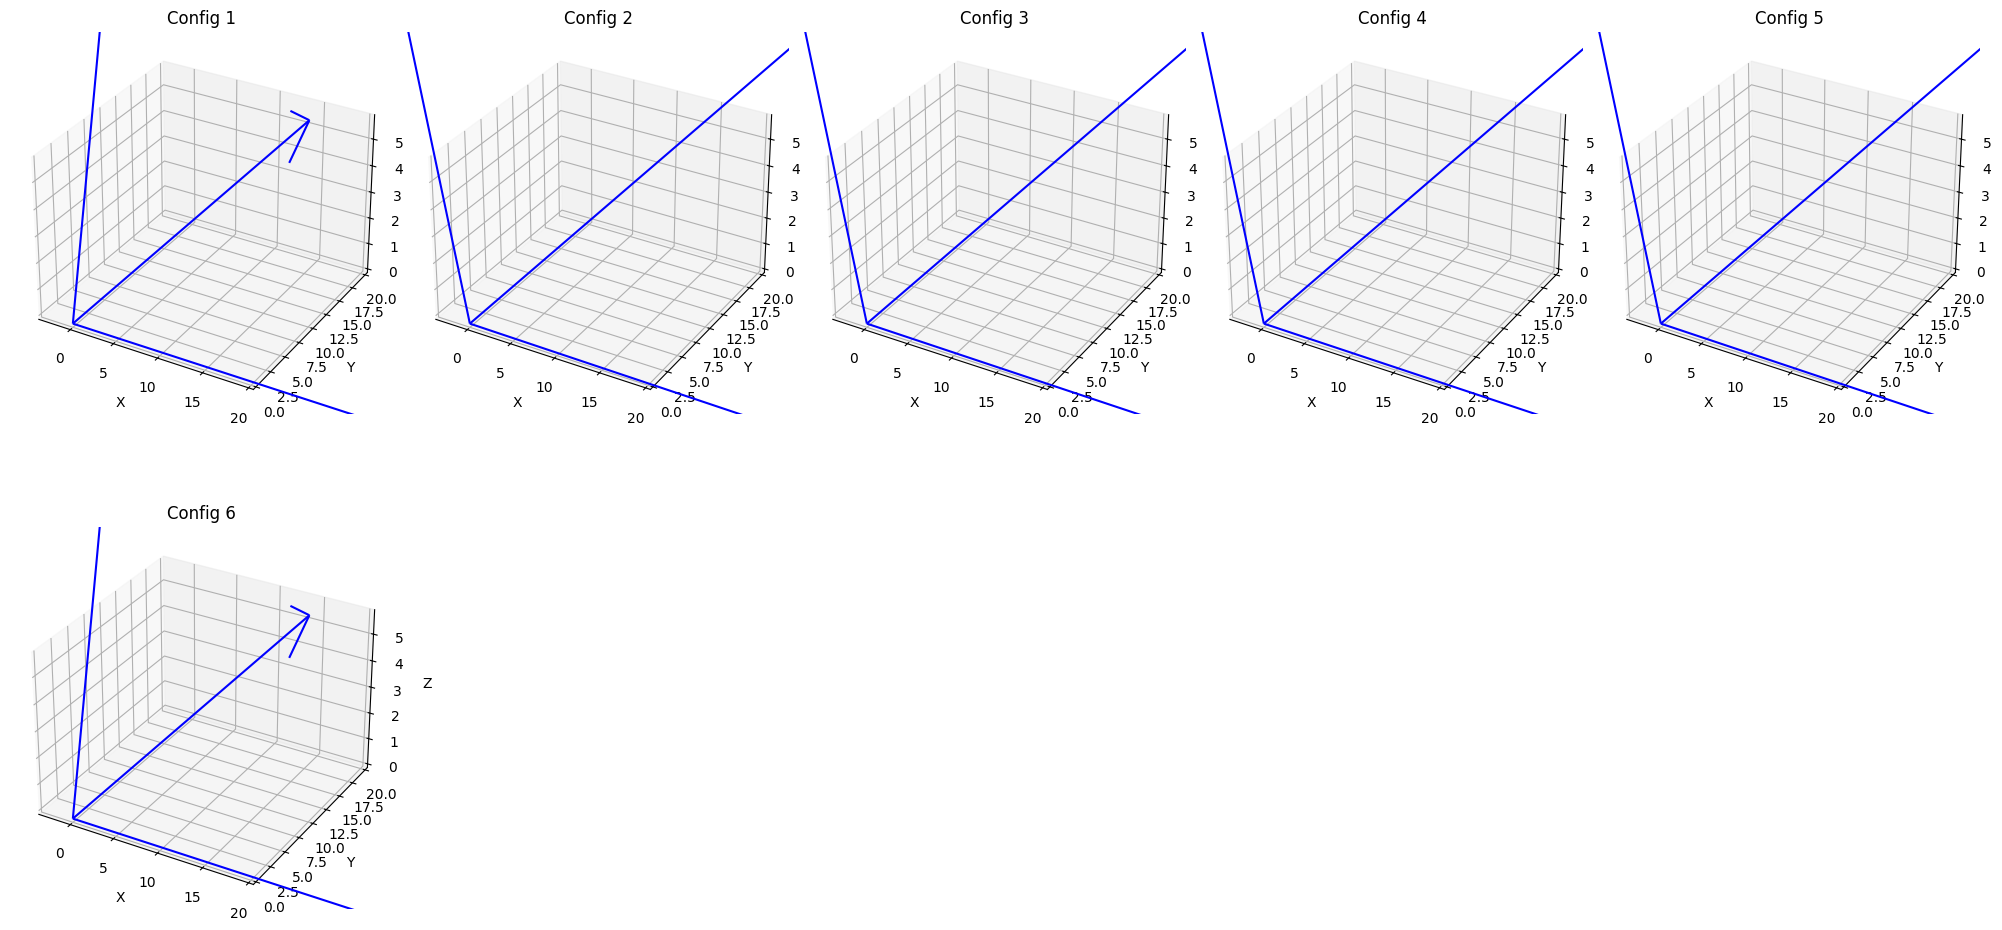

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a figure with subplots for each configuration
fig = plt.figure(figsize=(20, 15))

# Plotting each configuration
for i, lattice_vectors in enumerate(lattice_vectors_list):
    ax = fig.add_subplot(3, 5, i + 1, projection='3d')
    origin = np.zeros((3,))

    for vec in lattice_vectors:
        ax.quiver(*origin, *vec, length=np.linalg.norm(vec), color='b', arrow_length_ratio=0.1)
    
    # Setting labels and limits
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim([min_x, max_x])
    ax.set_ylim([min_y, max_y])
    ax.set_zlim([min_z, max_z])
    ax.set_title(f'Config {i + 1}')

plt.tight_layout()
plt.show()

In [ ]:
# Extract lattice vectors for the first configuration and print them
first_lattice_vectors = extract_lattice_vectors(atoms_list[0])
print(first_lattice_vectors)

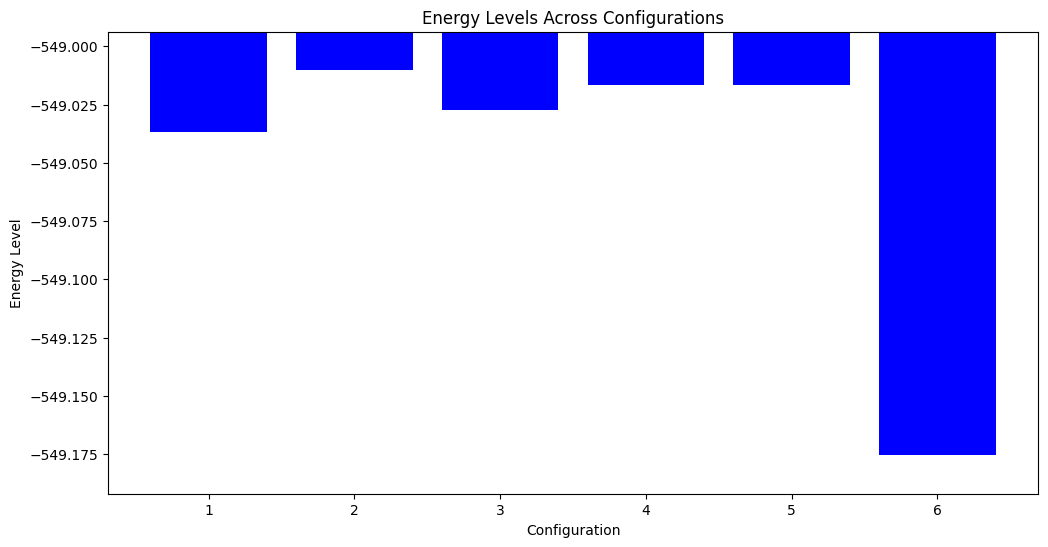

In [7]:
# Extracting energy levels from each configuration
energy_levels = [atoms.get_potential_energy() for atoms in atoms_list]

# Determine the minimum and maximum energy levels for setting y-axis limits
min_energy = min(energy_levels)
max_energy = max(energy_levels)
margin = (max_energy - min_energy) * 0.1  # Adding a 10% margin

# Plotting the energy levels as a bar graph with zoomed y-axis
plt.figure(figsize=(12, 6))
plt.bar(range(1, len(energy_levels) + 1), energy_levels, color='blue')
plt.xlabel('Configuration')
plt.ylabel('Energy Level')
plt.title('Energy Levels Across Configurations')
plt.xticks(range(1, len(energy_levels) + 1))  # Ensure x-axis labels are config numbers 1-14
plt.ylim(min_energy - margin, max_energy + margin)  # Zooming in on y-axis
plt.show()

e_per_atom_relaxed [-7.587571819473685, -7.587571819473685, -7.587571819473685, -7.587571819473685, -7.587571819473685, -7.587571819473685]


/tmp/ipykernel_3528/4243872753.py:19: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(min_e_per_atom_relaxed - margin, max_e_per_atom_relaxed + margin)  # Zooming in on y-axis


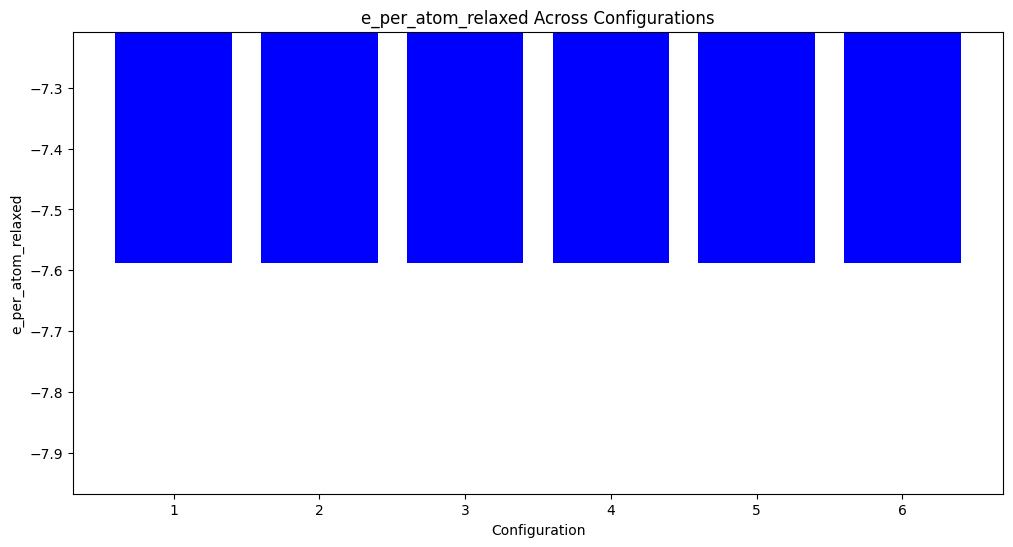

In [8]:
import matplotlib.pyplot as plt

e_per_atom_relaxed = [atoms.info.get('e_per_atom_relaxed', None) for atoms in atoms_list]
e_per_atom_relaxed = [ea for ea in e_per_atom_relaxed if ea is not None]  # Filter out None values

if e_per_atom_relaxed:  # Ensure there are valid bandgap values
    print("e_per_atom_relaxed", e_per_atom_relaxed)  # Print the values

    min_e_per_atom_relaxed = min(e_per_atom_relaxed)
    max_e_per_atom_relaxed = max(e_per_atom_relaxed)
    margin = (max_e_per_atom_relaxed - min_e_per_atom_relaxed) * 0.1  # Adding a 10% margin

    plt.figure(figsize=(12, 6))
    plt.bar(range(1, len(e_per_atom_relaxed) + 1), e_per_atom_relaxed, color='blue')
    plt.xlabel('Configuration')
    plt.ylabel('e_per_atom_relaxed')
    plt.title('e_per_atom_relaxed Across Configurations')
    plt.xticks(range(1, len(e_per_atom_relaxed) + 1))  # Ensure x-axis labels are config numbers 1-14
    plt.ylim(min_e_per_atom_relaxed - margin, max_e_per_atom_relaxed + margin)  # Zooming in on y-axis
    plt.show()
else:
    print("No valid bandgap values found in the configurations.")

Bandgap values: {'Configuration': [1, 6], 'Bandgap': [5.2827, 5.1370000000000005]}
e_per_atom_relaxed values: {'Configuration': [1, 2, 3, 4, 5, 6], 'e_per_atom_relaxed': [-7.587571819473685, -7.587571819473685, -7.587571819473685, -7.587571819473685, -7.587571819473685, -7.587571819473685]}
energy_per_atom values: {'Configuration': [1, 2, 3, 4, 5, 6], 'energy_per_atom': [-7.585748420000001, -7.585397929210526, -7.585622556842105, -7.585482883815789, -7.585479335263158, -7.587571819473684]}
ef_per_atom_relaxed values: {'Configuration': [1, 2, 3, 4, 5, 6], 'ef_per_atom_relaxed': [-7.587571819473685, -7.587571819473685, -7.587571819473685, -7.587571819473685, -7.587571819473685, -7.587571819473685]}
corrected_total_energy values: {'Configuration': [1, 2, 3, 4, 5, 6], 'corrected_total_energy': [-576.5168799200001, -576.49024262, -576.50731432, -576.49669917, -576.4964294800001, -576.6554582800001]}
ef_per_atom values: {'Configuration': [1, 2, 3, 4, 5, 6], 'ef_per_atom': [-2.582900094692982

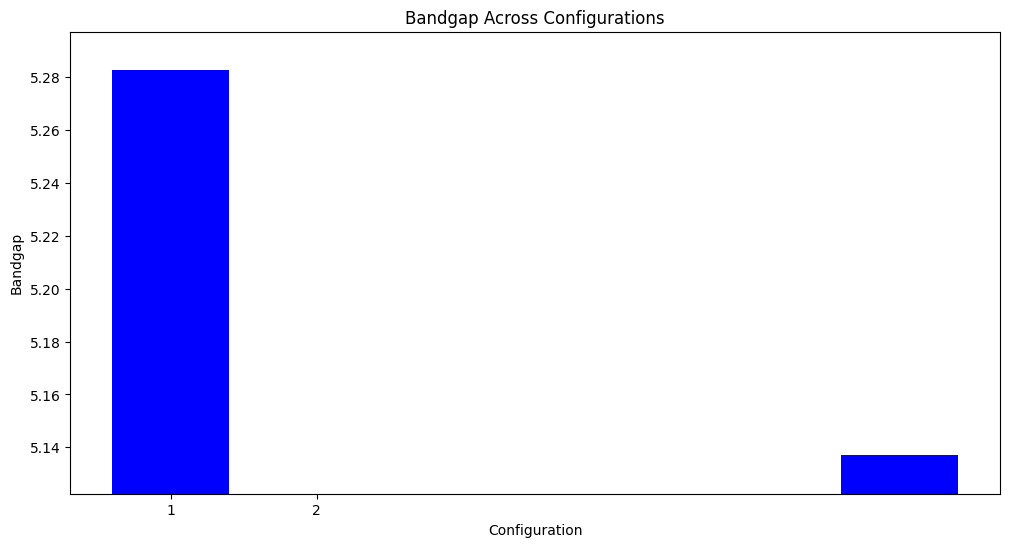

/tmp/ipykernel_3528/3082586646.py:42: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(min_value - margin, max_value + margin)  # Zooming in on y-axis


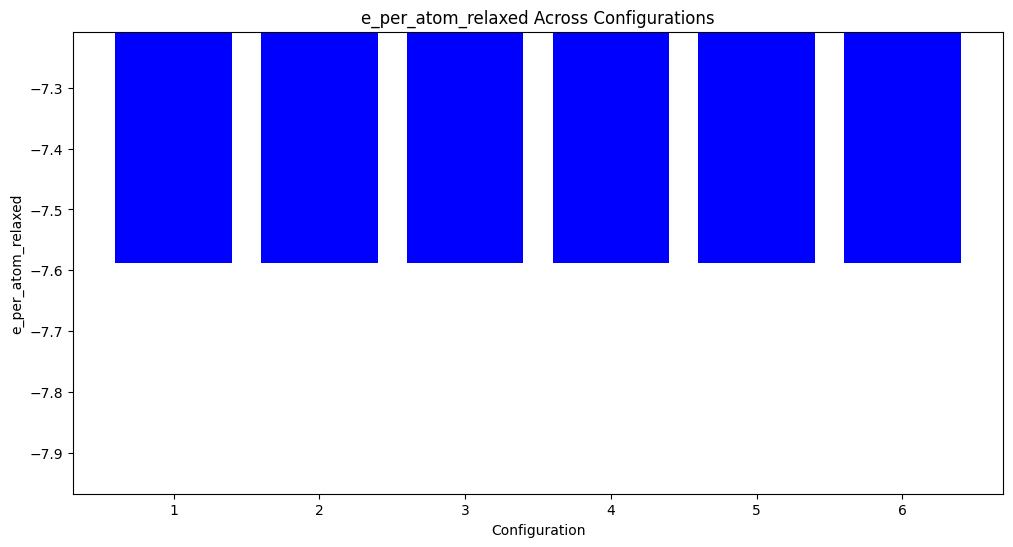

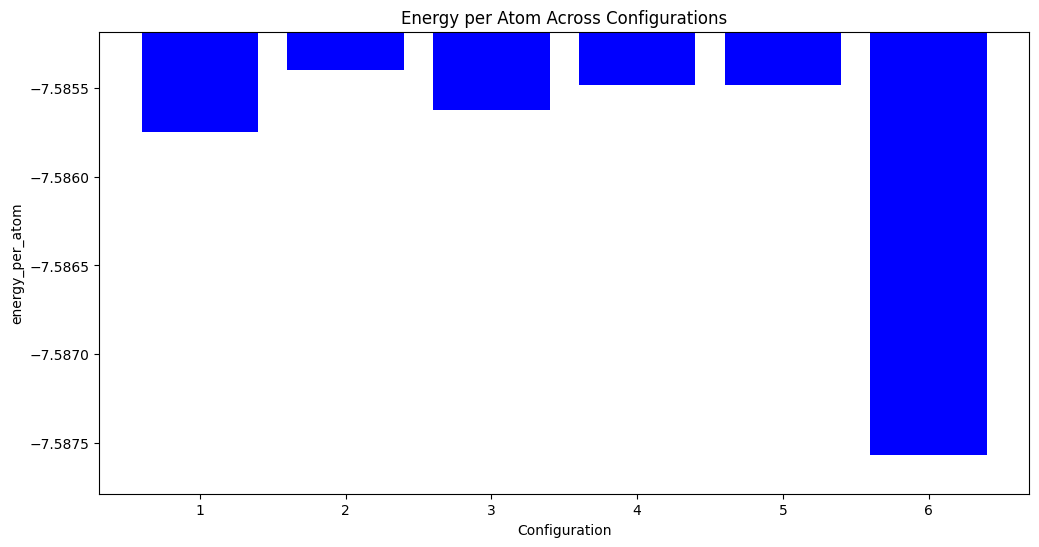

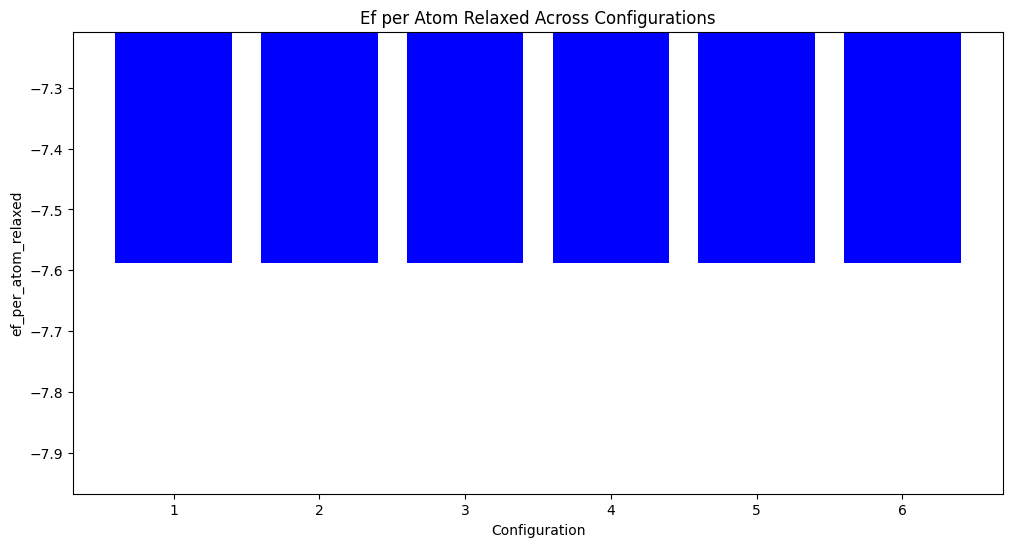

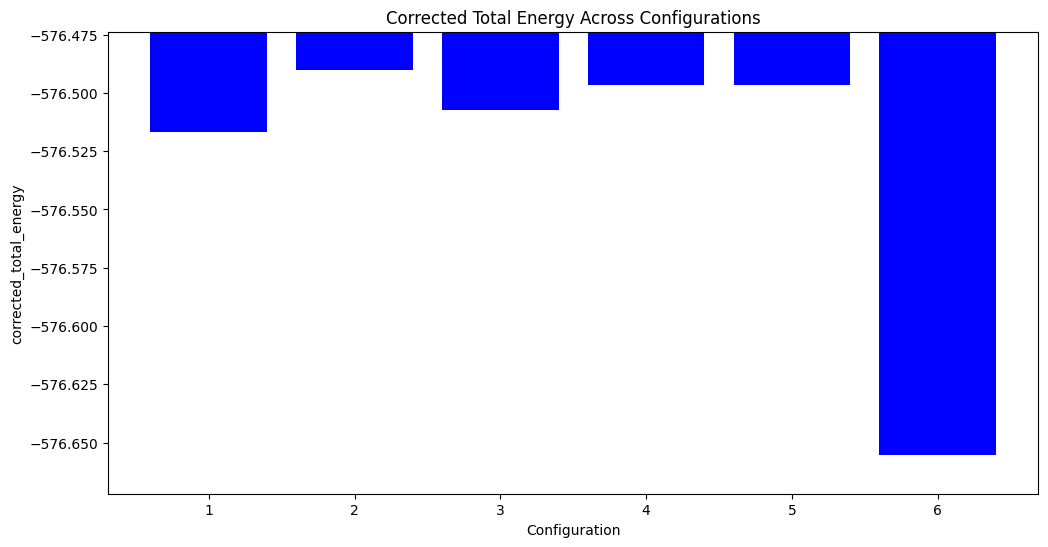

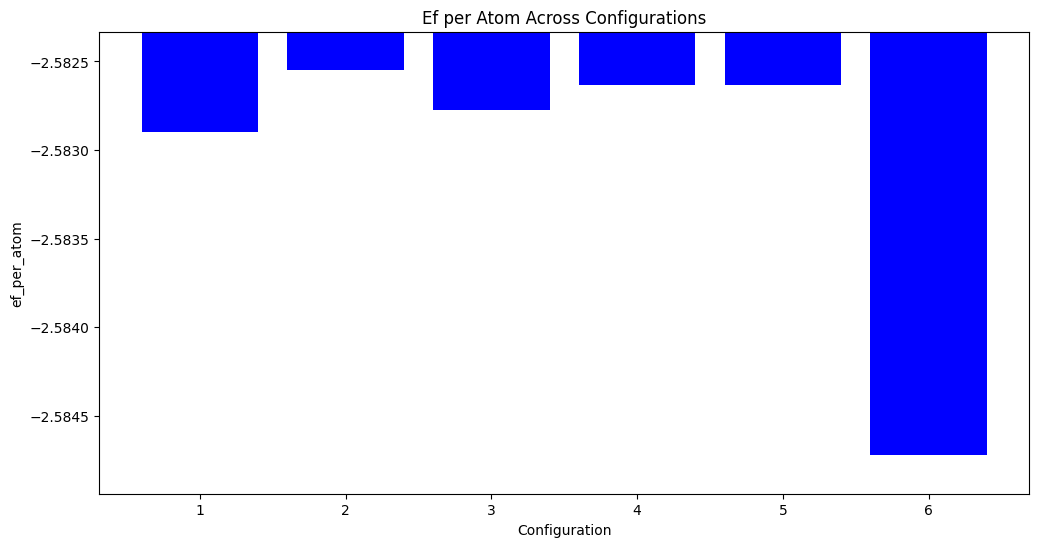

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Extracting data for each property
bandgaps = [atoms.info.get('bandgap', None) for atoms in atoms_list]
e_per_atom_relaxed = [atoms.info.get('e_per_atom_relaxed', None) for atoms in atoms_list]
energy_per_atom = [atoms.info.get('energy_per_atom', None) for atoms in atoms_list]
ef_per_atom_relaxed = [atoms.info.get('ef_per_atom_relaxed', None) for atoms in atoms_list]
corrected_total_energy = [atoms.info.get('corrected_total_energy', None) for atoms in atoms_list]
ef_per_atom = [atoms.info.get('ef_per_atom', None) for atoms in atoms_list]

# Creating DataFrames for each property
df_bandgap = pd.DataFrame({'Configuration': range(1, len(bandgaps) + 1), 'Bandgap': bandgaps}).dropna()
df_e_per_atom_relaxed = pd.DataFrame({'Configuration': range(1, len(e_per_atom_relaxed) + 1), 'e_per_atom_relaxed': e_per_atom_relaxed}).dropna()
df_energy_per_atom = pd.DataFrame({'Configuration': range(1, len(energy_per_atom) + 1), 'energy_per_atom': energy_per_atom}).dropna()
df_ef_per_atom_relaxed = pd.DataFrame({'Configuration': range(1, len(ef_per_atom_relaxed) + 1), 'ef_per_atom_relaxed': ef_per_atom_relaxed}).dropna()
df_corrected_total_energy = pd.DataFrame({'Configuration': range(1, len(corrected_total_energy) + 1), 'corrected_total_energy': corrected_total_energy}).dropna()
df_ef_per_atom = pd.DataFrame({'Configuration': range(1, len(ef_per_atom) + 1), 'ef_per_atom': ef_per_atom}).dropna()

# Printing values
print(f"Bandgap values: {df_bandgap.to_dict(orient='list')}")
print(f"e_per_atom_relaxed values: {df_e_per_atom_relaxed.to_dict(orient='list')}")
print(f"energy_per_atom values: {df_energy_per_atom.to_dict(orient='list')}")
print(f"ef_per_atom_relaxed values: {df_ef_per_atom_relaxed.to_dict(orient='list')}")
print(f"corrected_total_energy values: {df_corrected_total_energy.to_dict(orient='list')}")
print(f"ef_per_atom values: {df_ef_per_atom.to_dict(orient='list')}")

# Function to create bar chart with automatic zoom-in
def plot_bar_chart(df, y_label, title):
    values = df.iloc[:, 1]
    if not values.empty:
        min_value = min(values)
        max_value = max(values)
        margin = (max_value - min_value) * 0.1  # Adding a 10% margin

        plt.figure(figsize=(12, 6))
        plt.bar(df['Configuration'], values, color='blue')
        plt.xlabel('Configuration')
        plt.ylabel(y_label)
        plt.title(title)
        plt.xticks(range(1, len(df) + 1))
        plt.ylim(min_value - margin, max_value + margin)  # Zooming in on y-axis
        plt.show()
    else:
        print(f"No valid {y_label} values found in the configurations.")

# Plotting bar charts for each DataFrame
plot_bar_chart(df_bandgap, 'Bandgap', 'Bandgap Across Configurations')
plot_bar_chart(df_e_per_atom_relaxed, 'e_per_atom_relaxed', 'e_per_atom_relaxed Across Configurations')
plot_bar_chart(df_energy_per_atom, 'energy_per_atom', 'Energy per Atom Across Configurations')
plot_bar_chart(df_ef_per_atom_relaxed, 'ef_per_atom_relaxed', 'Ef per Atom Relaxed Across Configurations')
plot_bar_chart(df_corrected_total_energy, 'corrected_total_energy', 'Corrected Total Energy Across Configurations')
plot_bar_chart(df_ef_per_atom, 'ef_per_atom', 'Ef per Atom Across Configurations')

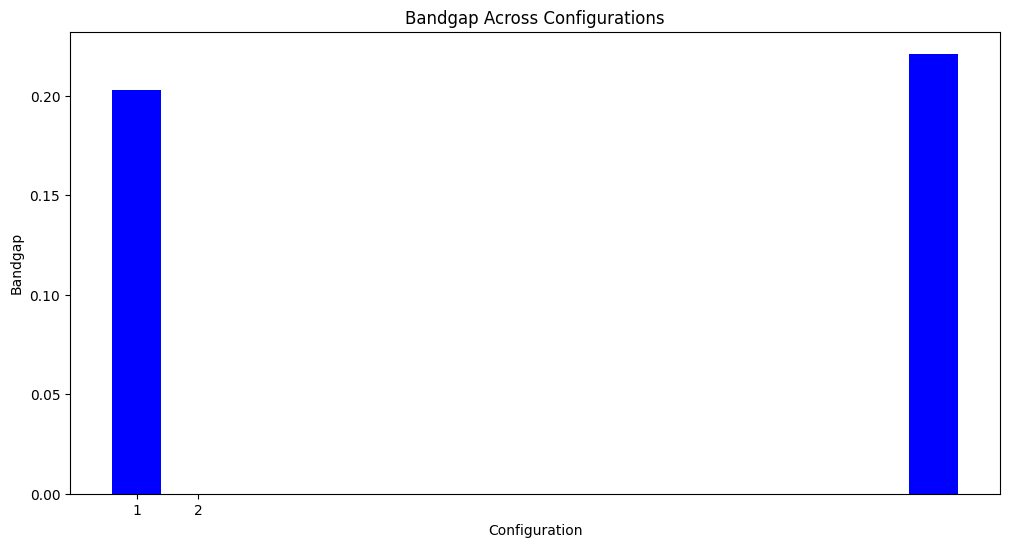

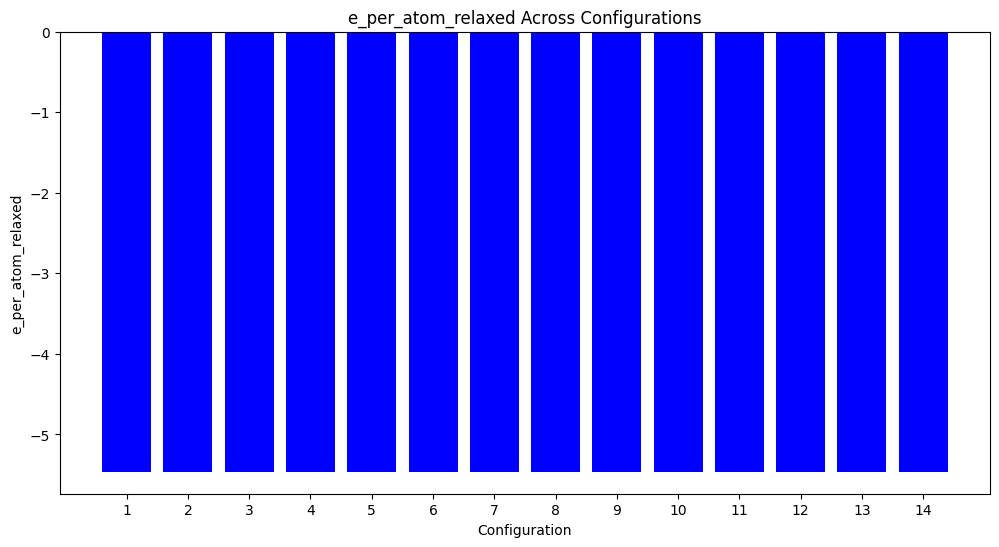

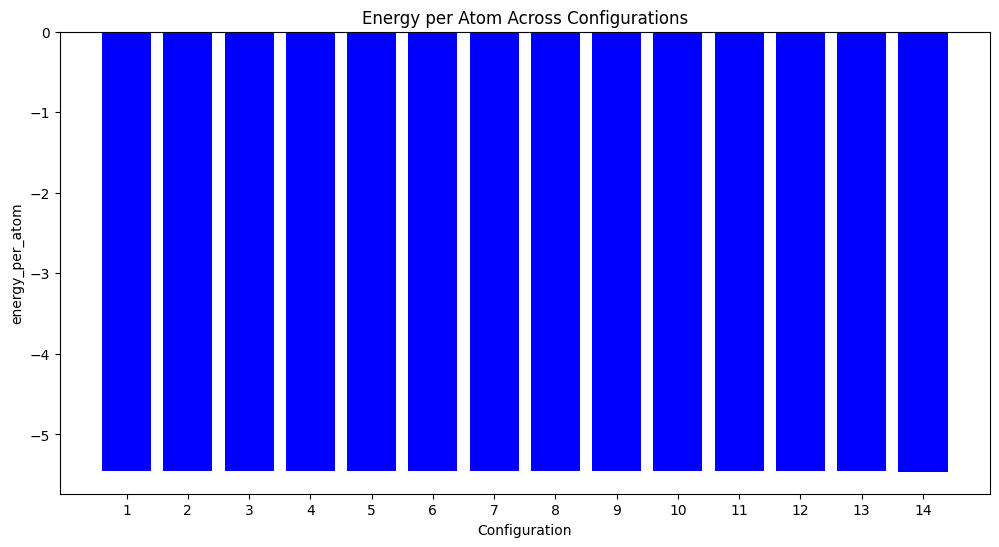

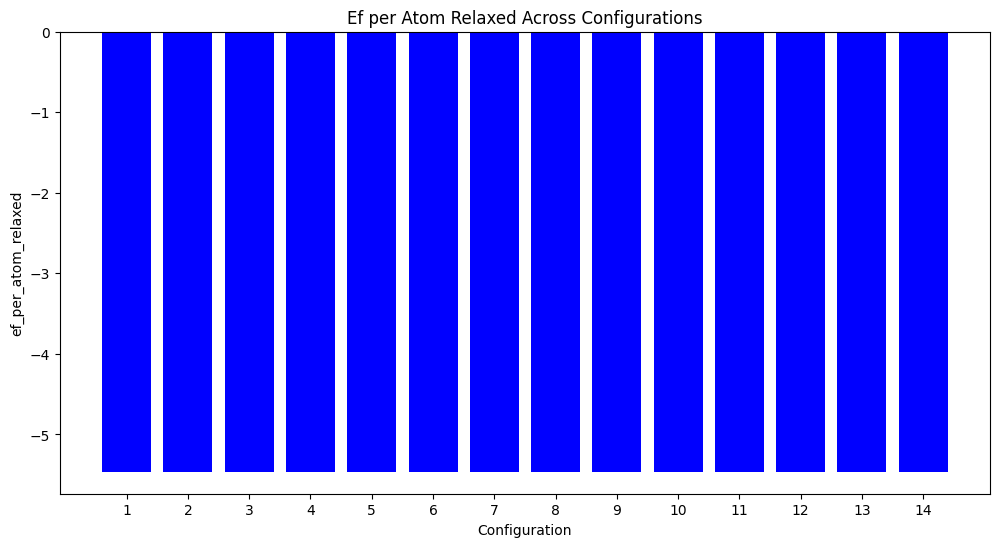

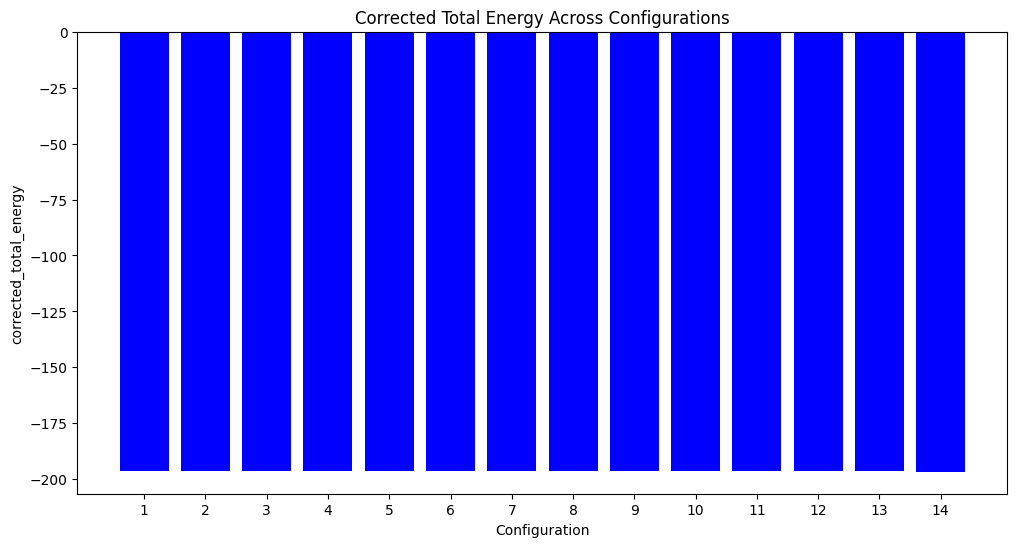

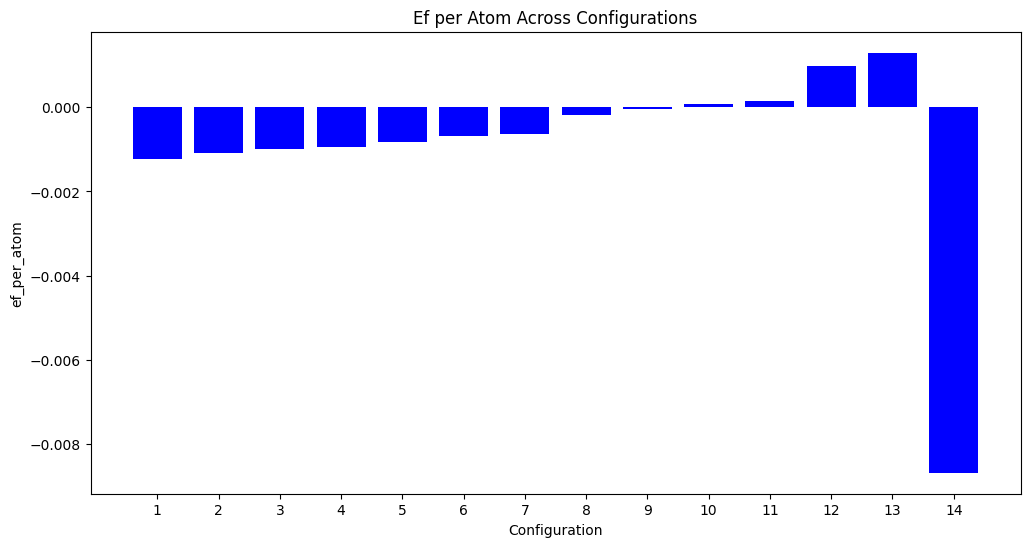

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# Extracting data for each property
bandgaps = [atoms.info.get('bandgap', None) for atoms in atoms_list]
e_per_atom_relaxed = [atoms.info.get('e_per_atom_relaxed', None) for atoms in atoms_list]
energy_per_atom = [atoms.info.get('energy_per_atom', None) for atoms in atoms_list]
ef_per_atom_relaxed = [atoms.info.get('ef_per_atom_relaxed', None) for atoms in atoms_list]
corrected_total_energy = [atoms.info.get('corrected_total_energy', None) for atoms in atoms_list]
ef_per_atom = [atoms.info.get('ef_per_atom', None) for atoms in atoms_list]

# Creating DataFrames for each property
df_bandgap = pd.DataFrame({'Configuration': range(1, len(bandgaps) + 1), 'Bandgap': bandgaps}).dropna()
df_e_per_atom_relaxed = pd.DataFrame({'Configuration': range(1, len(e_per_atom_relaxed) + 1), 'e_per_atom_relaxed': e_per_atom_relaxed}).dropna()
df_energy_per_atom = pd.DataFrame({'Configuration': range(1, len(energy_per_atom) + 1), 'energy_per_atom': energy_per_atom}).dropna()
df_ef_per_atom_relaxed = pd.DataFrame({'Configuration': range(1, len(ef_per_atom_relaxed) + 1), 'ef_per_atom_relaxed': ef_per_atom_relaxed}).dropna()
df_corrected_total_energy = pd.DataFrame({'Configuration': range(1, len(corrected_total_energy) + 1), 'corrected_total_energy': corrected_total_energy}).dropna()
df_ef_per_atom = pd.DataFrame({'Configuration': range(1, len(ef_per_atom) + 1), 'ef_per_atom': ef_per_atom}).dropna()

# Function to create bar chart
def plot_bar_chart(df, y_label, title):
    plt.figure(figsize=(12, 6))
    plt.bar(df['Configuration'], df.iloc[:, 1], color='blue')
    plt.xlabel('Configuration')
    plt.ylabel(y_label)
    plt.title(title)
    plt.xticks(range(1, len(df) + 1))
    plt.show()

# Plotting bar charts for each DataFrame
plot_bar_chart(df_bandgap, 'Bandgap', 'Bandgap Across Configurations')
plot_bar_chart(df_e_per_atom_relaxed, 'e_per_atom_relaxed', 'e_per_atom_relaxed Across Configurations')
plot_bar_chart(df_energy_per_atom, 'energy_per_atom', 'Energy per Atom Across Configurations')
plot_bar_chart(df_ef_per_atom_relaxed, 'ef_per_atom_relaxed', 'Ef per Atom Relaxed Across Configurations')
plot_bar_chart(df_corrected_total_energy, 'corrected_total_energy', 'Corrected Total Energy Across Configurations')
plot_bar_chart(df_ef_per_atom, 'ef_per_atom', 'Ef per Atom Across Configurations')


In [24]:
from ase import Atoms

# Create or load your atoms object
atoms = Atoms('H2')

# Check available methods and attributes
print(dir(atoms))

['__add__', '__ase_optimizable__', '__class__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_ase_handles_dynamic_stress', '_calc', '_celldisp', '_cellobj', '_centering_as_array', '_constraints', '_del_constraints', '_get_atomic_numbers', '_get_constraints', '_get_positions', '_masked_rotate', '_pbc', '_set_positions', 'append', 'arrays', 'ase_objtype', 'calc', 'cell', 'center', 'constraints', 'copy', 'edit', 'euler_rotate', 'extend', 'fromdict', 'get_all_distances', 'get_angle', 'get_angles', 'get_angular_momentum', 'get_array', 'get_atomic_numbers', 'get_calculator', 'get_cell', 'get_cell_lengths_and